In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_excel('case_study1.xlsx')
df2 = pd.read_excel('case_study2.xlsx')

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report , precision_recall_fscore_support

In [13]:
df1.shape, df2.shape

((51296, 26), (51336, 62))

In [12]:
##removing nulls
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]

In [ ]:
##checking for nulls in df2 in each column more than 10000 times
columns_to_be_removed = []
for i in df2.columns:
    if df2.loc[df2[i] == -99999].shape[0] > 10000:
        columns_to_be_removed.append(i)

In [15]:
columns_to_be_removed

['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

In [17]:
df2=df2.drop(columns_to_be_removed, axis=1)

In [ ]:
df2.shape

(42066, 54)

In [19]:
for i in df2.columns:
    df2 = df2.loc[df2[i] != -99999]

In [21]:
df2.isna().sum()

PROSPECTID                    0
time_since_recent_payment     0
num_times_delinquent          0
max_recent_level_of_deliq     0
num_deliq_6mts                0
num_deliq_12mts               0
num_deliq_6_12mts             0
num_times_30p_dpd             0
num_times_60p_dpd             0
num_std                       0
num_std_6mts                  0
num_std_12mts                 0
num_sub                       0
num_sub_6mts                  0
num_sub_12mts                 0
num_dbt                       0
num_dbt_6mts                  0
num_dbt_12mts                 0
num_lss                       0
num_lss_6mts                  0
num_lss_12mts                 0
recent_level_of_deliq         0
tot_enq                       0
CC_enq                        0
CC_enq_L6m                    0
CC_enq_L12m                   0
PL_enq                        0
PL_enq_L6m                    0
PL_enq_L12m                   0
time_since_recent_enq         0
enq_L12m                      0
enq_L6m 

In [24]:
##merged DataSet
df = pd.merge(df1 , df2 , how='inner' , left_on=['PROSPECTID'] , right_on=['PROSPECTID'])

In [26]:
df.isna().sum().sum()

0

In [27]:
df.shape

(42064, 79)

In [29]:
##checking fot categorical columns
categorical_columns = []
for i in df.columns:
    if df[i].dtype == 'object':
        categorical_columns.append(i)

categorical_columns

['MARITALSTATUS',
 'EDUCATION',
 'GENDER',
 'last_prod_enq2',
 'first_prod_enq2',
 'Approved_Flag']

In [31]:
from scipy.stats import chi2_contingency

In [33]:
for i in categorical_columns:
    chi2 , pval , _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i , '---' , pval)
##all the categroical features have pval<=0.05 , we accept all

MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287
Approved_Flag --- 0.0


In [38]:
##checking fot numerical columns
numerical_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['Approved_Flag', 'PROSPECTID']:
        numerical_columns.append(i)

len(numerical_columns)

72

In [42]:
##removing inter correlated features
vif_data = df[numerical_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0
for i in range(0, total_columns):
    vif_value = variance_inflation_factor(vif_data , column_index)
    print(column_index , '---', vif_value)

    if vif_value <= 6:
        columns_to_be_kept.append(numerical_columns[i])
        column_index += 1
    else:
        vif_data = vif_data.drop([numerical_columns[i]], axis=1)
columns_to_be_kept

c:\Users\FUSION\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf


c:\Users\FUSION\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf
0 --- 11.320180023967996
0 --- 8.363698035000336
0 --- 6.520647877790928
0 --- 5.149501618212625
1 --- 2.611111040579735


c:\Users\FUSION\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


2 --- inf
2 --- 1788.7926256209232
2 --- 8.601028256477228
2 --- 3.8328007921530785
3 --- 6.099653381646739
3 --- 5.5813520096427585
4 --- 1.985584353098778


c:\Users\FUSION\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


5 --- inf
5 --- 4.809538302819343
6 --- 23.270628983464636
6 --- 30.595522588100053
6 --- 4.3843464059655854
7 --- 3.0646584155234238
8 --- 2.898639771299253
9 --- 4.377876915347322
10 --- 2.2078535836958433
11 --- 4.916914200506864
12 --- 5.2147020300647275
13 --- 3.3861625024231476
14 --- 7.840583309478997
14 --- 5.255034641721438


c:\Users\FUSION\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


15 --- inf
15 --- 7.380634506427232
15 --- 1.4210050015175733
16 --- 8.083255010190316
16 --- 1.624122752404011
17 --- 7.257811920140003
17 --- 15.59624383268298
17 --- 1.825857047132431
18 --- 1.5080839450032664
19 --- 2.172088834824578
20 --- 2.6233975535272274
21 --- 2.2959970812106167
22 --- 7.360578319196446
22 --- 2.1602387773102554
23 --- 2.8686288267891467
24 --- 6.458218003637277
24 --- 2.8474118865638265
25 --- 4.7531981562840855
26 --- 16.22735475594825
26 --- 6.424377256363877
26 --- 8.887080381808687
26 --- 2.3804746142952653
27 --- 8.60951347651454
27 --- 13.06755093547673
27 --- 3.500040056654654
28 --- 1.9087955874813773
29 --- 17.006562234161628
29 --- 10.730485153719197
29 --- 2.3538497522950275
30 --- 22.104855915136433
30 --- 2.7971639638512906
31 --- 3.424171203217696
32 --- 10.175021454450922
32 --- 6.408710354561301
32 --- 1.001151196262562
33 --- 3.069197305397274
34 --- 2.8091261600643715
35 --- 20.249538381980678
35 --- 15.864576541593774
35 --- 1.833164974053

['pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'Tot_TL_closed_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'CC_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'max_recent_level_of_deliq',
 'num_deliq_6_12mts',
 'num_times_60p_dpd',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'CC_enq_L12m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L3m',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'pct_currentBal_all_TL',
 'CC_Flag',
 'PL_Flag',
 'pct_PL_enq_L6m_of_ever',
 'pct_CC_enq_L6m_of_ever',
 'HL_Flag',
 'GL_Flag']

In [43]:
len(columns_to_be_kept)

39

In [44]:
##Annova test
from scipy.stats import f_oneway
columns_to_be_kept_numerical = []
for i in columns_to_be_kept:
    a = list(df[i])
    b = list(df['Approved_Flag'])
    group_p1 = [value for value , group in zip(a, b) if group == 'P1']
    group_p2 = [value for value , group in zip(a, b) if group == 'P2']
    group_p3 = [value for value , group in zip(a, b) if group == 'P3']
    group_p4 = [value for value , group in zip(a, b) if group == 'P4']

    f_statistic, p_value = f_oneway(group_p1, group_p2, group_p3, group_p4)
    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)

In [45]:
len(columns_to_be_kept_numerical)

37

In [46]:
df.loc[df['EDUCATION']=='SSC' , ['EDUCATION']] = 1
df.loc[df['EDUCATION']=='12TH' , ['EDUCATION']] = 2
df.loc[df['EDUCATION']=='GRADUATE' , ['EDUCATION']] = 3
df.loc[df['EDUCATION']=='UNDER GRADUATE' , ['EDUCATION']] = 3
df.loc[df['EDUCATION']=='POST-GRADUATE' , ['EDUCATION']] = 4
df.loc[df['EDUCATION']=='OTHERS' , ['EDUCATION']] = 1
df.loc[df['EDUCATION']=='PROFESSIONAL' , ['EDUCATION']] = 3

In [47]:
df['EDUCATION'].value_counts()

EDUCATION
3    18931
2    11703
1     9532
4     1898
Name: count, dtype: int64

In [48]:
df['EDUCATION'] = df['EDUCATION'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  42064 non-null  int64  
 1   Total_TL                    42064 non-null  int64  
 2   Tot_Closed_TL               42064 non-null  int64  
 3   Tot_Active_TL               42064 non-null  int64  
 4   Total_TL_opened_L6M         42064 non-null  int64  
 5   Tot_TL_closed_L6M           42064 non-null  int64  
 6   pct_tl_open_L6M             42064 non-null  float64
 7   pct_tl_closed_L6M           42064 non-null  float64
 8   pct_active_tl               42064 non-null  float64
 9   pct_closed_tl               42064 non-null  float64
 10  Total_TL_opened_L12M        42064 non-null  int64  
 11  Tot_TL_closed_L12M          42064 non-null  int64  
 12  pct_tl_open_L12M            42064 non-null  float64
 13  pct_tl_closed_L12M          420

In [59]:
df_encoded = pd.get_dummies(df , columns=['MARITALSTATUS' , 'GENDER' , 'last_prod_enq2' , 'first_prod_enq2'])

In [63]:
df_encoded.columns

Index(['PROSPECTID', 'Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL',
       'Total_TL_opened_L6M', 'Tot_TL_closed_L6M', 'pct_tl_open_L6M',
       'pct_tl_closed_L6M', 'pct_active_tl', 'pct_closed_tl',
       'Total_TL_opened_L12M', 'Tot_TL_closed_L12M', 'pct_tl_open_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL',
       'Consumer_TL', 'Gold_TL', 'Home_TL', 'PL_TL', 'Secured_TL',
       'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL',
       'time_since_recent_payment', 'num_times_delinquent',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd',
       'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts',
       'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss',
       'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq',
       'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m',
       'PL_enq_L12

In [66]:
from sklearn.model_selection import train_test_split
y = df_encoded['Approved_Flag']
x = df_encoded.drop(['Approved_Flag'] , axis=1)

In [79]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [80]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision , recall , f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

Accuracy: 0.9900154522762391


In [81]:
for i , v in enumerate(['p1' , 'p2' , 'p3' , 'p4']):
    print(f"Class{v}:")
    print(f"Preision : {precision[i]}")
    print(f"Recall : {recall[i]}")
    print(f"F1 Score : {f1_score[i]}")
    print()

Classp1:
Preision : 0.9465290806754222
Recall : 0.995069033530572
F1 Score : 0.9701923076923077

Classp2:
Preision : 0.9954617205998422
Recall : 1.0
F1 Score : 0.9977256995945812

Classp3:
Preision : 0.9968102073365231
Recall : 0.9433962264150944
F1 Score : 0.9693679720822024

Classp4:
Preision : 1.0
Recall : 0.9961127308066083
F1 Score : 0.9980525803310614



In [99]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=4)
y_xgb = df_encoded['Approved_Flag']
x_xgb = df_encoded.drop(['Approved_Flag'] , axis=1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_xgb)
x_train , x_test , y_train , y_test = train_test_split(x_xgb, y_encoded , test_size=0.5, random_state=42)
xgb_classifier.fit(x_train, y_train)
y_pred_xgb = xgb_classifier.predict(x_test)

In [100]:
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)
precision , recall , f1_score, _ = precision_recall_fscore_support(y_test, y_pred_xgb)

Accuracy: 0.9999524534043363


In [101]:
for i , v in enumerate(['p1' , 'p2' , 'p3' , 'p4']):
    print(f"Class{v}:")
    print(f"Preision : {precision[i]}")
    print(f"Recall : {recall[i]}")
    print(f"F1 Score : {f1_score[i]}")
    print()

Classp1:
Preision : 1.0
Recall : 1.0
F1 Score : 1.0

Classp2:
Preision : 1.0
Recall : 1.0
F1 Score : 1.0

Classp3:
Preision : 1.0
Recall : 0.9996914532551682
F1 Score : 0.9998457028236384

Classp4:
Preision : 0.9996156802459646
Recall : 1.0
F1 Score : 0.999807803190467



In [102]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_xgb))


[[ 2489     0     0     0]
 [    0 12701     0     0]
 [    0     0  3240     1]
 [    0     0     0  2601]]


In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb, target_names=['p1', 'p2', 'p3', 'p4']))


              precision    recall  f1-score   support

          p1       1.00      1.00      1.00      2489
          p2       1.00      1.00      1.00     12701
          p3       1.00      1.00      1.00      3241
          p4       1.00      1.00      1.00      2601

    accuracy                           1.00     21032
   macro avg       1.00      1.00      1.00     21032
weighted avg       1.00      1.00      1.00     21032



In [104]:
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef, hamming_loss
)

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['p1', 'p2', 'p3', 'p4']))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_xgb))
print("Cohen Kappa Score:", cohen_kappa_score(y_test, y_pred_xgb))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_xgb))
print("Hamming Loss:", hamming_loss(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Classification Report:
              precision    recall  f1-score   support

          p1       1.00      1.00      1.00      2489
          p2       1.00      1.00      1.00     12701
          p3       1.00      1.00      1.00      3241
          p4       1.00      1.00      1.00      2601

    accuracy                           1.00     21032
   macro avg       1.00      1.00      1.00     21032
weighted avg       1.00      1.00      1.00     21032

Accuracy: 0.9999524534043363
Balanced Accuracy: 0.999922863313792
Cohen Kappa Score: 0.9999183432152071
Matthews Correlation Coefficient: 0.9999183471004695
Hamming Loss: 4.754659566375048e-05
Confusion Matrix:
[[ 2489     0     0     0]
 [    0 12701     0     0]
 [    0     0  3240     1]
 [    0     0     0  2601]]


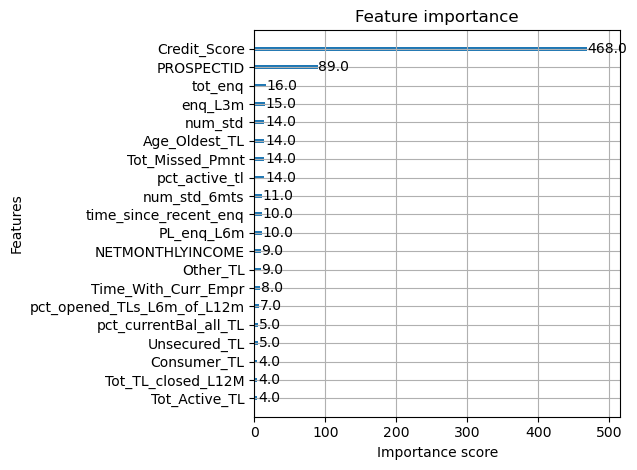

In [105]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_classifier, max_num_features=20)
plt.tight_layout()
plt.show()


In [108]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=4)
target = df_encoded['Approved_Flag']
features = df_encoded.drop(['Approved_Flag', 'PROSPECTID'], axis=1) 
label_enc = LabelEncoder()
target_encoded = label_enc.fit_transform(target)
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.5, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)


In [109]:
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef, hamming_loss
)

print("Classification Report:")
print(classification_report(y_test, xgb_predictions, target_names=['p1', 'p2', 'p3', 'p4']))

print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, xgb_predictions))
print("Cohen Kappa Score:", cohen_kappa_score(y_test, xgb_predictions))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, xgb_predictions))
print("Hamming Loss:", hamming_loss(y_test, xgb_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_predictions))


Classification Report:
              precision    recall  f1-score   support

          p1       0.98      0.97      0.97      2489
          p2       1.00      1.00      1.00     12701
          p3       0.98      0.98      0.98      3241
          p4       1.00      1.00      1.00      2601

    accuracy                           0.99     21032
   macro avg       0.99      0.99      0.99     21032
weighted avg       0.99      0.99      0.99     21032

Accuracy: 0.9938664891593761
Balanced Accuracy: 0.9881849468113262
Cohen Kappa Score: 0.9894652905192911
Matthews Correlation Coefficient: 0.9894691100473026
Hamming Loss: 0.006133510840623811
Confusion Matrix:
[[ 2409     0    80     0]
 [    0 12701     0     0]
 [   48     0  3192     1]
 [    0     0     0  2601]]
